# Final Project - Piano Roll Extraction -SRC
- Course: AAI-511-Neural Networks
- Institution: University of San Diego
- Professor: Kahila Mokhtari Jadid
- Group 4 Members: 
    * Lucas Young
    * Titouan Margret
    * Juan Pablo Triana Martinez

This notebook has the intention to follow `data_piano_roll_extraction.ipynb`, but using `src` folder with all functions and classes

In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import os

path = Path().resolve().parent
notebook_path = str(path)
print(path)
print(path.exists())
sys.path.insert(1, notebook_path) 

/Users/lucasyoung/MSAAI-511-group-4
True


In [2]:
#Import necessary modules
import os
import numpy as np
import kagglehub
from src import DataRetriever, MidiPreprocesser, MidiToNumpy, obtain_piano_rolls, PianoRollsDiscreteEqualizer

### Donwload data

In [3]:
# Obtain current path and data folder path
curr_path = Path.cwd()
download_path = curr_path.parent / "data"
data_path = download_path / "final_proj_data"

#Setup download path to specific data fold (GENUIENLY, Why Kaggelhub :) )
os.environ["KAGGLEHUB_CACHE"] = download_path.__str__()

if download_path.exists():
    print(f"{download_path}: Already exists, no need to create a new one")
else:
    download_path.mkdir(parents=True, exist_ok=True)

if data_path.exists():
    print(f"{data_path}: Already exists, no need to create a new one")
else:
    data_path.mkdir(parents=True, exist_ok=True)

# Download latest version
# path = kagglehub.dataset_download("blanderbuss/midi-classic-music")
# print("Path to dataset files:", path)

/Users/lucasyoung/MSAAI-511-group-4/data: Already exists, no need to create a new one
/Users/lucasyoung/MSAAI-511-group-4/data/final_proj_data: Already exists, no need to create a new one


In [4]:
midipreprocesser = MidiPreprocesser(data_path = data_path)
midiobj, labels_composer = midipreprocesser.get_midi_info()

Reading_final_proj_data files...: 0it [00:00, ?it/s]
Reading_Chopin files...: 100%|██████████| 136/136 [00:07<00:00, 19.42it/s]
Reading composers..: 3it [00:13,  4.88s/it]

Anhang 14-3.mid cannot be read, is skipped


Reading_Bach files...: 100%|██████████| 122/122 [00:33<00:00,  3.62it/s]
Reading composers..: 5it [01:05, 13.06s/it]


In [5]:
list_np_arrays, list_composer_names, list_song_names = obtain_piano_rolls(midiobject = midiobj)

Creating Piano roll: K626 Requiem 05 Recordare: 100%|██████████| 3535/3535 [00:00<00:00, 3589.54it/s]
Creating Piano roll: K492 Overture ''Le Nozze di Figaro'': 100%|██████████| 9529/9529 [00:02<00:00, 3521.59it/s]
Creating Piano roll: K427 Great Mass 1mov: 100%|██████████| 4669/4669 [00:02<00:00, 2010.06it/s]
Creating Piano roll: K299 Flute Harp Concerto 3mov: 100%|██████████| 9036/9036 [00:02<00:00, 3403.85it/s]
Creating Piano roll: Viennese Sonatinas K439b n2 3mov: 100%|██████████| 573/573 [00:00<00:00, 2680.89it/s]
Creating Piano roll: K525 Serenade 2mov ''Eine Kleine Natchmusik'': 100%|██████████| 5642/5642 [00:02<00:00, 2365.39it/s]
Creating Piano roll: Sonatina n3 2mov: 100%|██████████| 1284/1284 [00:00<00:00, 1609.02it/s]
Creating Piano roll: K546 Adagio & Fugue for Strings: 100%|██████████| 4973/4973 [00:03<00:00, 1533.24it/s]
Creating Piano roll: K02 Minuet in F: 100%|██████████| 260/260 [00:00<00:00, 3283.57it/s]
Creating Piano roll: Viennese Sonatinas K439b n2 1mov: 100%|██

KeyboardInterrupt: 

In [11]:
equalizer = PianoRollsDiscreteEqualizer(piano_rolls = list_np_arrays)
eq_piano_rolls = equalizer.get_equalized()
print(eq_piano_rolls.shape)

Equalizing piano rolls...: 100%|██████████| 1528/1528 [00:00<00:00, 5321.10it/s]


(1528, 128, 1565)


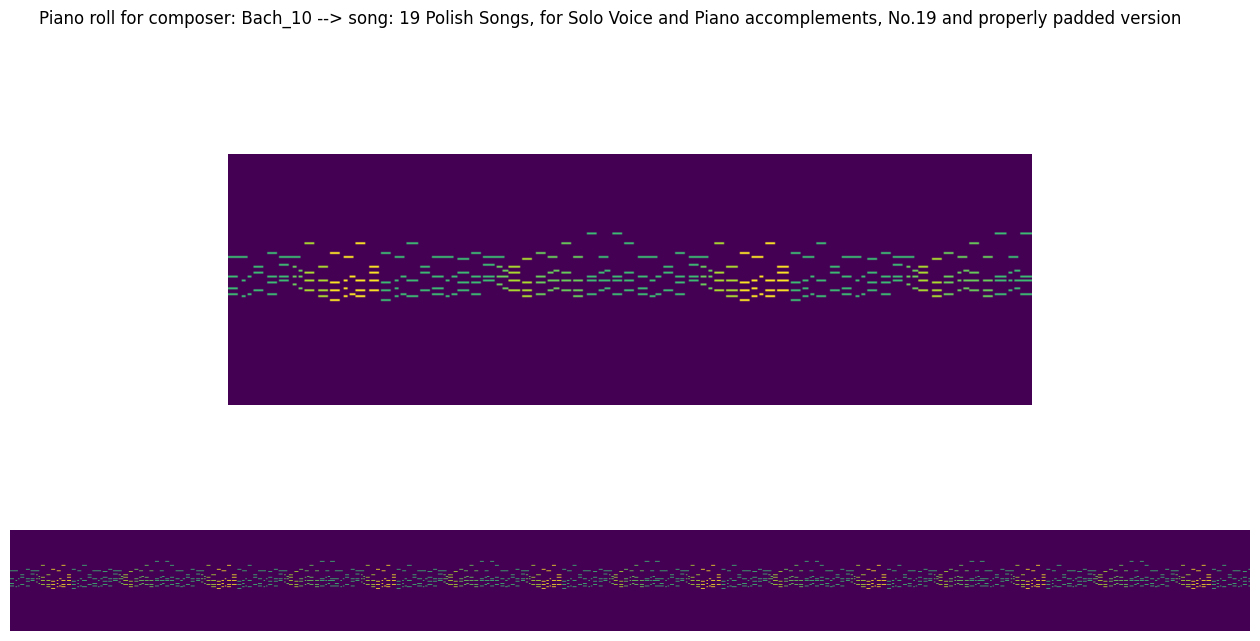

In [12]:
index = 10
fig = plt.figure(figsize=(16, 8))
fig.suptitle(f"Piano roll for composer: {list_composer_names[index]} --> song: {list_song_names[index]} and properly padded version")
fig.subplots_adjust(top = 0.8)
ax1 = fig.add_subplot(2, 1, 1)
ax1.imshow(list_np_arrays[index], label = list_composer_names[index])
ax1.axis("off")

ax2 = fig.add_subplot(2, 1, 2)
ax2.imshow(eq_piano_rolls[index], label = list_composer_names[index])
ax2.axis("off")

plt.show()
